In [110]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-bright')

train_data = pd.read_csv('data/train.csv', index_col='PassengerId')
test_data = pd.read_csv('data/test.csv', index_col='PassengerId')
y = train_data['Survived']
X_train = train_data.drop('Survived', axis=1)
raw_data = pd.concat([X_train, test_data])
raw_data


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


<AxesSubplot:>

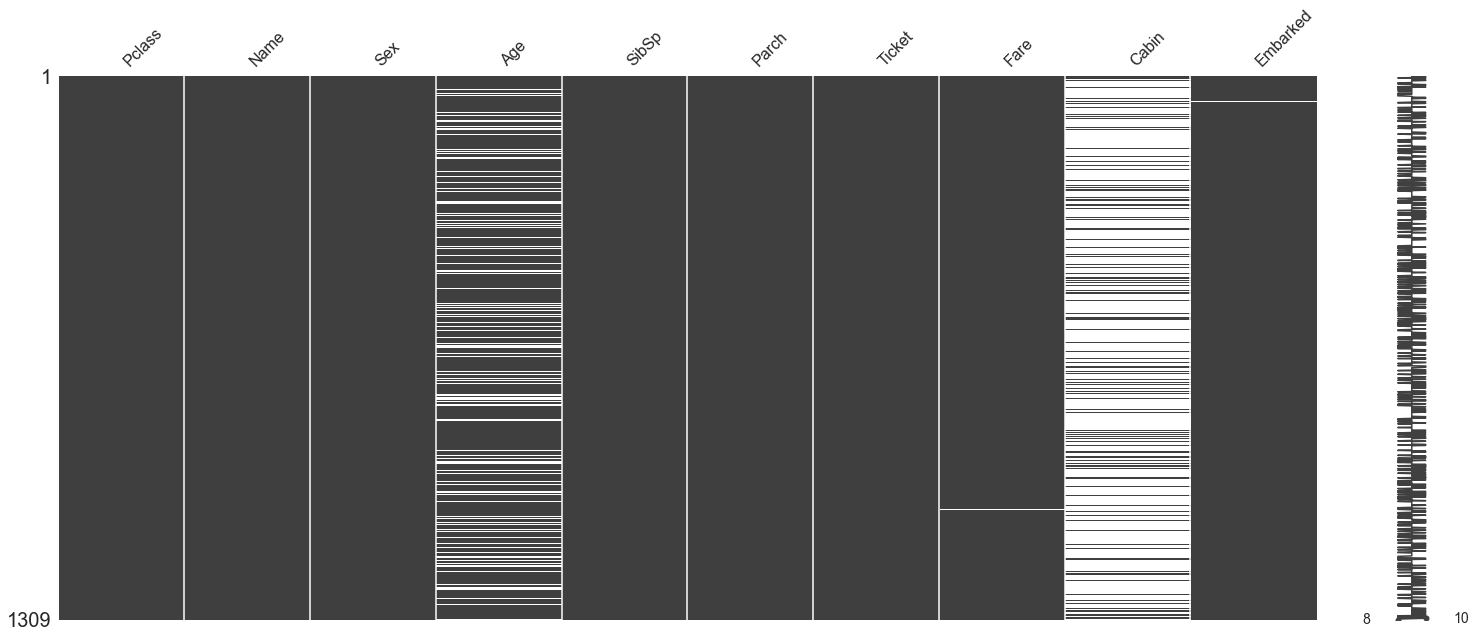

In [111]:
# 缺失值显示
import missingno as msno

msno.matrix(raw_data)

<AxesSubplot:>

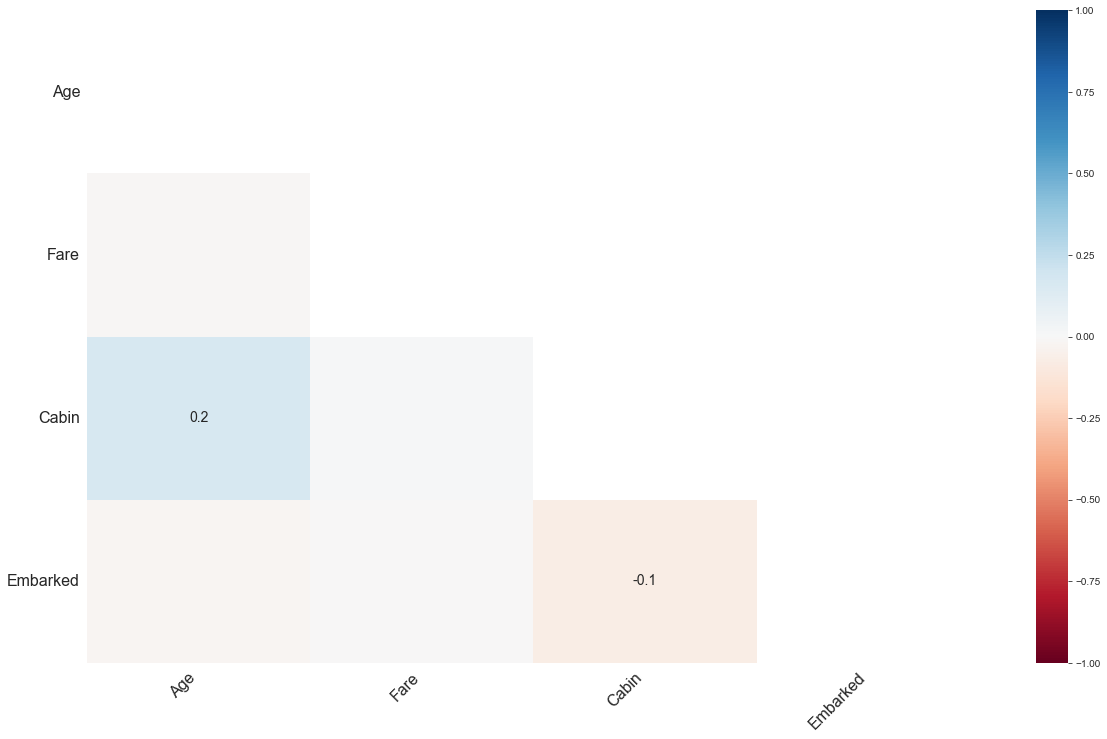

In [112]:
msno.heatmap(raw_data)

<AxesSubplot:>

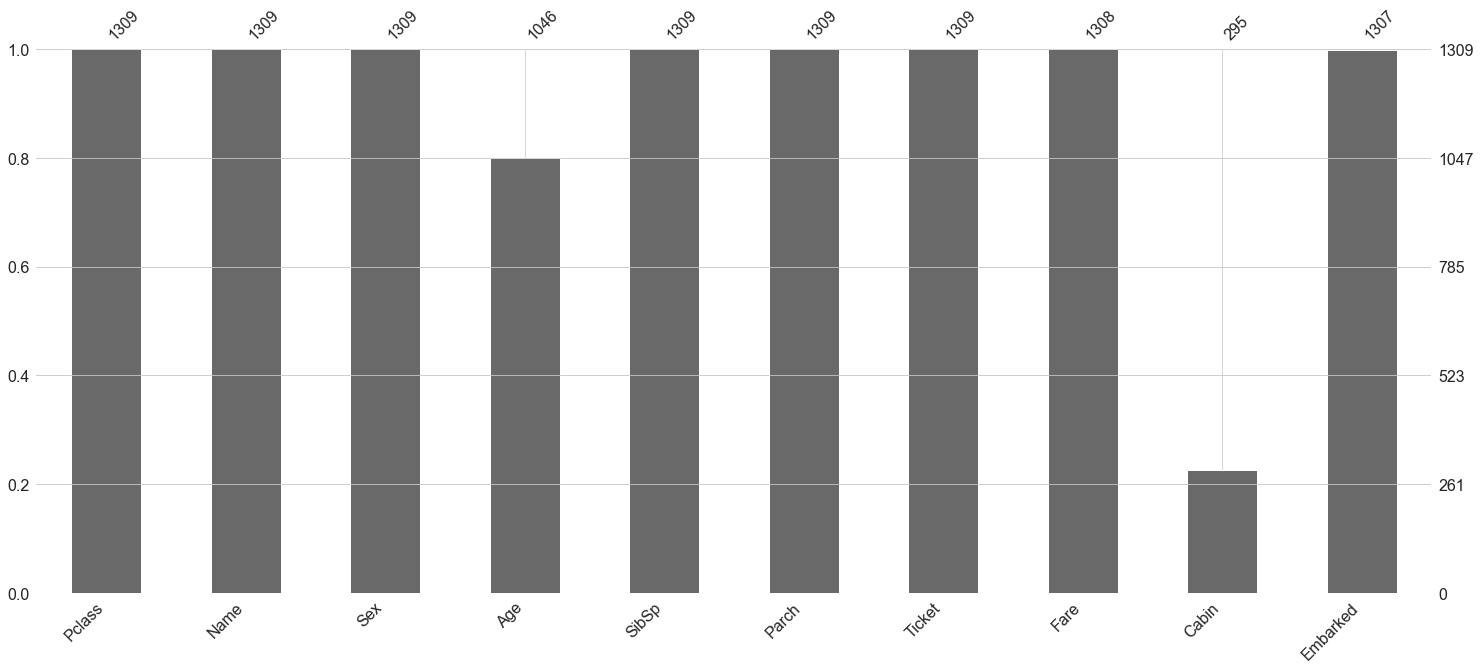

In [113]:
# train_data.drop(['Cabin', 'Name'], axis=1, inplace=True)
# test_data.drop(['Cabin', 'Name'], axis=1, inplace=True)
# train_data
msno.bar(raw_data)

<AxesSubplot:>

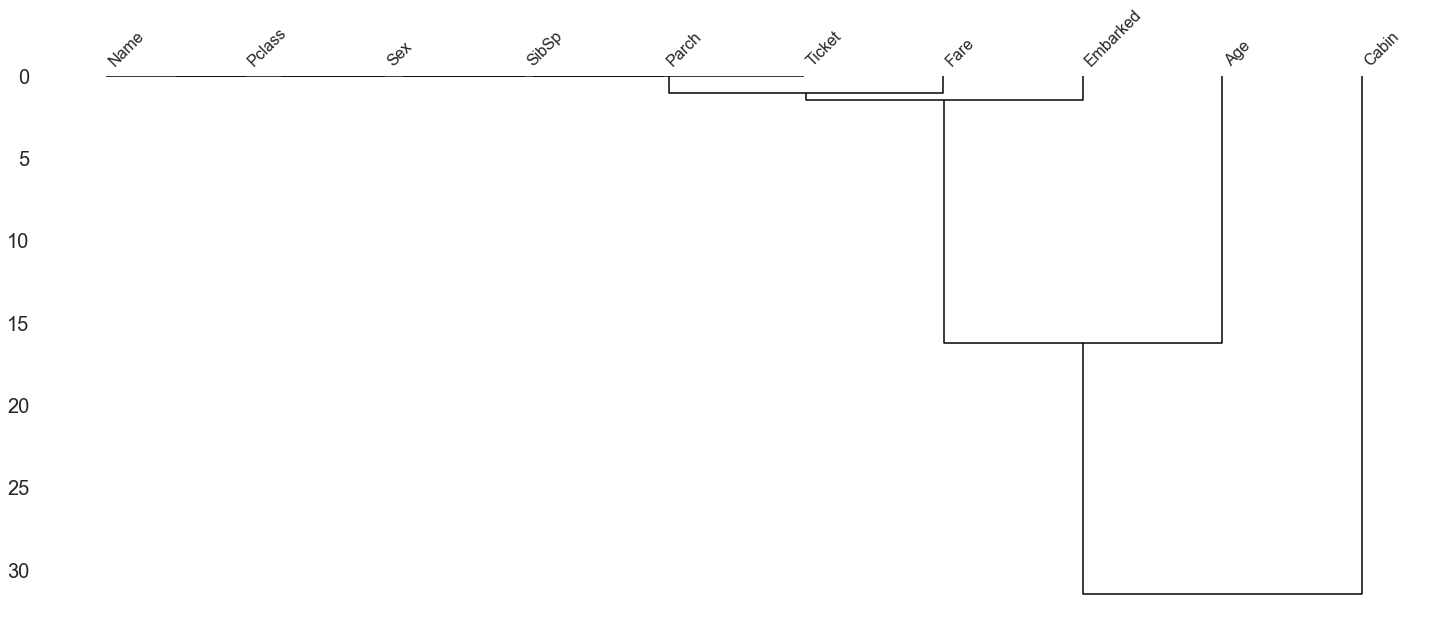

In [114]:
msno.dendrogram(raw_data)

In [115]:
raw_data.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [116]:
# 年龄缺失值处理
titles = raw_data.Name.str.findall(r'\w+\.')
title_set = set()
for title in titles:
    title_set.update(title)
title_set.remove('Jonkheer.')
print(title_set)

{'Master.', 'L.', 'Mrs.', 'Miss.', 'Lady.', 'Rev.', 'Mlle.', 'Col.', 'Capt.', 'Mr.', 'Mme.', 'Dona.', 'Don.', 'Ms.', 'Countess.', 'Sir.', 'Dr.', 'Major.'}


In [117]:
title_index = {}
for title in title_set:
    title_index[title] = raw_data.Name.str.contains(title[:-1] + '\.')

In [118]:
raw_data['Title'] = 0

In [119]:
raw_data[title_index['Dona.']]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,0


In [120]:
for title, title_i in title_index.items():
    raw_data.loc[title_i, 'Title'] = title

In [121]:
for title, title_i in title_index.items():
    raw_data.loc[title_i, 'Age'] = raw_data.loc[title_i, 'Age'].fillna(value=raw_data.loc[title_i, 'Age'].mean())

In [122]:
raw_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr.
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.
3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs.
5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Mr.
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Dona.
1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr.


In [123]:
raw_data.drop('Name', axis=1, inplace=True)
raw_data

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,
1,3,male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr.
2,1,female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs.
3,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
4,1,female,35.000000,1,0,113803,53.1000,C123,S,Mrs.
5,3,male,35.000000,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...
1305,3,male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Mr.
1306,1,female,39.000000,0,0,PC 17758,108.9000,C105,C,Dona.
1307,3,male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr.


In [124]:
raw_data.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
raw_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,
1,3,male,22.000000,1,0,7.2500,S,Mr.
2,1,female,38.000000,1,0,71.2833,C,Mrs.
3,3,female,26.000000,0,0,7.9250,S,Miss.
4,1,female,35.000000,1,0,53.1000,S,Mrs.
5,3,male,35.000000,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...
1305,3,male,32.252151,0,0,8.0500,S,Mr.
1306,1,female,39.000000,0,0,108.9000,C,Dona.
1307,3,male,38.500000,0,0,7.2500,S,Mr.


In [125]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='most_frequent')
raw_data.Embarked = imp.fit_transform(raw_data[['Embarked']])



In [126]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer()
raw_data.Fare = imp.fit_transform(raw_data[['Fare']])
raw_data.Fare.isnull()

PassengerId
1       False
2       False
3       False
4       False
5       False
        ...  
1305    False
1306    False
1307    False
1308    False
1309    False
Name: Fare, Length: 1309, dtype: bool

<AxesSubplot:>

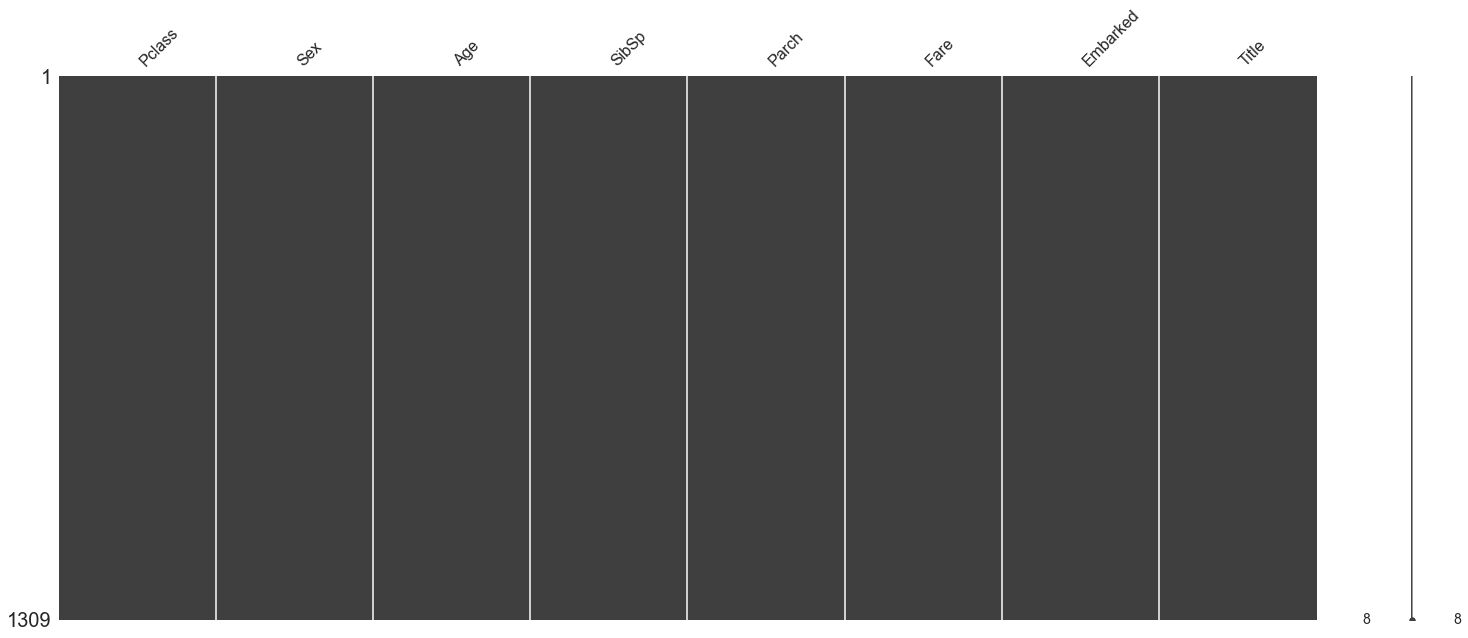

In [127]:
msno.matrix(raw_data)

In [128]:
data = pd.get_dummies(raw_data)
data

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,Title_Major.,Title_Master.,Title_Miss.,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.000000,1,0,7.2500,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,38.000000,1,0,71.2833,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,26.000000,0,0,7.9250,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,35.000000,1,0,53.1000,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,3,35.000000,0,0,8.0500,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,32.252151,0,0,8.0500,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1306,1,39.000000,0,0,108.9000,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1307,3,38.500000,0,0,7.2500,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [129]:
data.drop('Sex_male', axis=1, inplace=True)

In [130]:
data.loc[title_index['Dona.'], 'Title_Mrs.'] = 1
data.loc[title_index['Dona.'], 'Title_Mrs.']

PassengerId
1306    1
Name: Title_Mrs., dtype: uint8

In [131]:
data.drop('Title_Dona.', axis=1, inplace=True)

In [138]:
train_data = pd.concat([data[:len(y)], y], axis=1)
train_data

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Title_Capt.,...,Title_Master.,Title_Miss.,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.,Survived
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.000000,1,0,7.2500,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,38.000000,1,0,71.2833,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,3,26.000000,0,0,7.9250,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,1,35.000000,1,0,53.1000,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
5,3,35.000000,0,0,8.0500,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27.000000,0,0,13.0000,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
888,1,19.000000,0,0,30.0000,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
889,3,21.774238,1,2,23.4500,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [133]:
train_data.corr().loc['Title_Mrs.', 'Title_Mr.']

-0.4749524060903271

In [134]:
# 可以看到数据之间并没有较强的相关性
train_data.corr()['Survived'].sort_values(key=abs, ascending=False)

Survived           1.000000
Title_Mr.         -0.549199
Sex_female         0.543351
Title_Mrs.         0.339040
Pclass            -0.338481
Title_Miss.        0.327093
Fare               0.257307
Embarked_C         0.168240
Embarked_S        -0.149683
Age               -0.087092
Title_Master.      0.085221
Parch              0.081629
Title_Rev.        -0.064988
Title_Mlle.        0.060095
Title_Lady.        0.042470
Title_Mme.         0.042470
Title_Ms.          0.042470
Title_Sir.         0.042470
Title_Countess.    0.042470
SibSp             -0.035322
Title_0           -0.026456
Title_Capt.       -0.026456
Title_Don.        -0.026456
Title_Major.       0.011329
Title_Col.         0.011329
Title_Dr.          0.008185
Embarked_Q         0.003650
Name: Survived, dtype: float64

In [135]:
data.loc[data.Title_0 == 1, 'Title_Mr.'] = 1

In [136]:
data.drop('Title_0', axis=1, inplace=True)

In [137]:
train_data

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Title_0,...,Title_Master.,Title_Miss.,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.,Survived
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.000000,1,0,7.2500,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,38.000000,1,0,71.2833,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,3,26.000000,0,0,7.9250,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,1,35.000000,1,0,53.1000,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
5,3,35.000000,0,0,8.0500,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,27.000000,0,0,13.0000,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
888,1,19.000000,0,0,30.0000,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
889,3,21.774238,1,2,23.4500,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [101]:
sns.set_style('whitegrid')
sns.pairplot(train_data, kind='scatter', diag_kind='kde')

Error in callback <function flush_figures at 0x000002DCD6A35940> (for post_execute):


KeyboardInterrupt: 

[Text(0, 0, '0.188908'), Text(0, 0, '0.742038')]

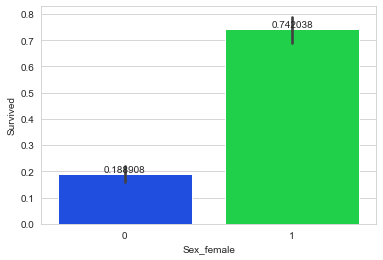

In [102]:
ax = sns.barplot(data=train_data, x='Sex_female', y='Survived')
ax.bar_label(ax.containers[0])

In [142]:
train_data['Fare']

PassengerId
1      1.981001
2      4.266662
3      2.070022
4      3.972177
5      2.085672
         ...   
887    2.564949
888    3.401197
889    3.154870
890    3.401197
891    2.047693
Name: Fare, Length: 891, dtype: float64

d:\project\python\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

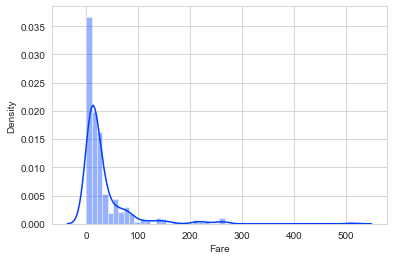

In [140]:
import scipy.stats as st

sns.distplot(data['Fare'], kde=True)

In [141]:
train_data['Fare'] = train_data['Fare'].map(lambda x: np.log(x) if x > 0 else x)


d:\project\python\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

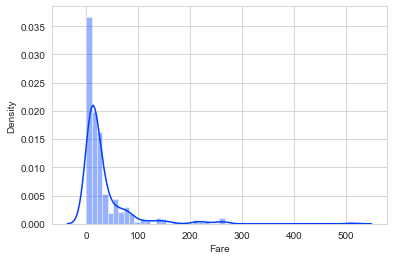

In [143]:
sns.distplot(data['Fare'], kde=True)

In [144]:
train_data.skew().sort_values(key=abs)

Title_Mr.          -0.330431
Age                 0.362217
Fare                0.443109
Survived            0.478523
Sex_female          0.618921
Pclass             -0.630548
Embarked_S         -1.009665
Title_Miss.         1.469548
Embarked_C          1.595149
Title_Mrs.          2.075013
Parch               2.749117
Embarked_Q          2.948778
SibSp               3.695352
Title_Master.       4.403096
Title_Dr.          11.167515
Title_Rev.         12.082970
Title_Col.         21.071227
Title_Mlle.        21.071227
Title_Major.       21.071227
Title_Don.         29.849623
Title_Mme.         29.849623
Title_Sir.         29.849623
Title_Ms.          29.849623
Title_Lady.        29.849623
Title_Countess.    29.849623
Title_Capt.        29.849623
dtype: float64

In [147]:
data

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Title_Capt.,...,Title_Major.,Title_Master.,Title_Miss.,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,3,22.000000,1,0,1.981001,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,38.000000,1,0,4.266662,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,26.000000,0,0,2.070022,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,35.000000,1,0,3.972177,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5,3,35.000000,0,0,2.085672,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,32.252151,0,0,2.085672,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1306,1,39.000000,0,0,4.690430,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1307,3,38.500000,0,0,1.981001,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [146]:
data.Fare = data.Fare.map(lambda x: np.log(x) if x > 0 else 0)

<AxesSubplot:>

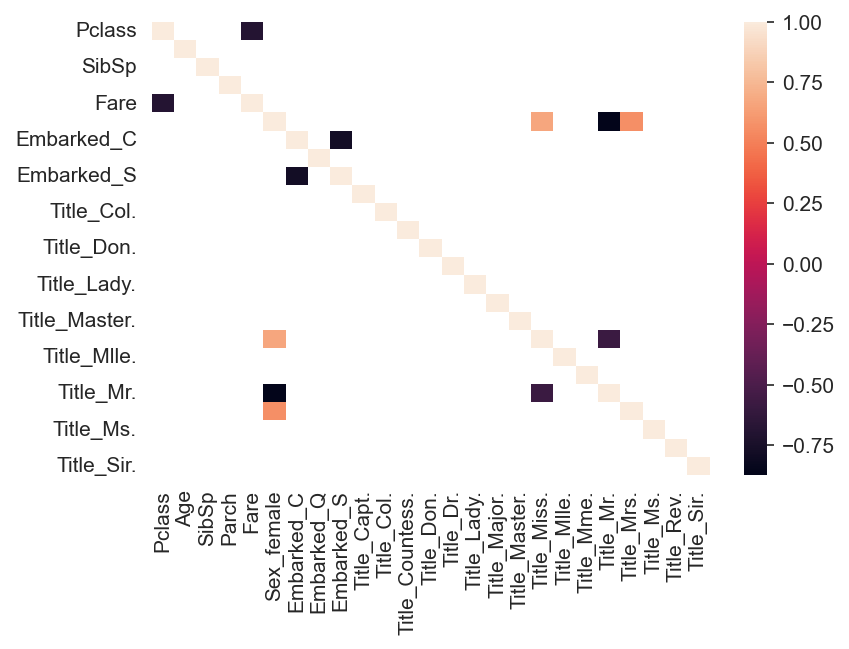

In [154]:
plt.figure(dpi=150)
sns.heatmap(data.corr()[data.corr().abs() > .5])

In [148]:
import torch

torch.save([data, y], 'data_v2.pkl')